### Advanced Dictionary 

### Inverting a Dictionary

Sometimes you want to look up a value and get the corresponding key.
For example, if you have a word counter that maps each word to its count, you might want a dictionary that maps a count to the words that appear that many times.

The challenge is that dictionary keys must be unique, but values don't have to be.
One way to invert a dictionary is to create a new dictionary where each value maps to a list of keys from the original.
As an example, let's count the letters in `parrot`.


In [ ]:
d = value_counts('parrot')
d


{'p': 1, 'a': 1, 'r': 2, 'o': 1, 't': 1}

If we invert this dictionary, the result should be `{1: ['p', 'a', 'o', 't'], 2: ['r']}`.
That means the letters that appear once are `'p'`, `'a'`, `'o'`, and `'t'`, and the letter that appears twice is `'r'`.

The following function takes a dictionary and returns its inverse as a new dictionary.

In [ ]:
def invert_dict(d):
    new = {}
    for key, value in d.items():
        if value not in new:
            new[value] = [key]
        else:
            new[value].append(key)
    return new


The `for` loop walks through the keys and values in `d`.
If the value is not already in the new dictionary, we create a list with one key.
Otherwise we append the key to the existing list.

We can test it like this:


In [ ]:
invert_dict(d)

{1: ['p', 'a', 'o', 't'], 2: ['r']}

In [ ]:
### Exercise: Inverting a Dictionary
#   Given the dictionary below that maps student names to grades,
#   use invert_dict() to find all students who received each grade.
#   Print the inverted dictionary.
grades = {'Alice': 'A', 'Bob': 'B', 'Carol': 'A', 'Dave': 'C', 'Eve': 'B'}
### Your code starts here.




### Your code ends here.

In [ ]:
grades = {'Alice': 'A', 'Bob': 'B', 'Carol': 'A', 'Dave': 'C', 'Eve': 'B'}
print(invert_dict(grades))
# {'A': ['Alice', 'Carol'], 'B': ['Bob', 'Eve'], 'C': ['Dave']}

{'A': ['Alice', 'Carol'], 'B': ['Bob', 'Eve'], 'C': ['Dave']}


### Sorting Dictionaries

Sometimes you want to sort dictionary items by their values rather than their keys.
We can define a small helper that returns the second element of a `(key, value)` pair.


In [ ]:
def second_element(t):
    return t[1]

Then we pass that function as the optional `key` argument to `sorted`.
The `key` function computes a **sort key** for each item.

In [ ]:
counter = value_counts('parrot')
items = counter.items()
sorted_items = sorted(items, key=second_element)
sorted_items


[('p', 1), ('a', 1), ('o', 1), ('t', 1), ('r', 2)]

The sort key determines the order.
The letter with the lowest count appears first, and the highest count appears last.
So we can find the most common letter like this:

In [ ]:
sorted_items[-1]

('r', 2)

If we only want the maximum, we don't have to sort the list.
We can use `max`, which also accepts a `key` function.

In [ ]:
max(items, key=second_element)

('r', 2)

In [ ]:
### Exercise: Sorting by Value
#   1. Count the letter frequencies in the word 'mississippi'.
#   2. Sort the resulting items by frequency (value), ascending.
#   3. Print the letter with the highest frequency using max() with a key function.
### Your code starts here.




### Your code ends here.

In [ ]:
counter = value_counts('mississippi')
items = counter.items()

def second_element(t):
    return t[1]

print(sorted(items, key=second_element))   # sorted by frequency ascending
print(max(items, key=second_element))      # ('i', 4) most frequent letter


[('m', 1), ('p', 2), ('i', 4), ('s', 4)]
('i', 4)


### Dictionaries as Memory

If you ran the `fibonacci` function from [Chapter 6](section_fibonacci), maybe you noticed that the bigger the argument you provide, the longer the function takes to run.


In [ ]:
def fibonacci(n):
    if n == 0:
        return 0
    
    if n == 1:
        return 1

    return fibonacci(n-1) + fibonacci(n-2)

Furthermore, the run time increases quickly.
To understand why, consider the following figure, which shows the **call graph** for
`fibonacci` with `n=4`:

In [ ]:
from diagram import make_binding, Frame, Arrow

bindings = [make_binding('n', i) for i in range(5)]
frames = [Frame([binding]) for binding in bindings]

In [ ]:
arrowprops = dict(arrowstyle="-", color='gray', alpha=0.5, ls='-', lw=0.5)

def left_arrow(ax, bbox1, bbox2):
    x = bbox1.xmin + 0.1
    y = bbox1.ymin
    dx = bbox2.xmax - x - 0.1
    dy = bbox2.ymax - y
    arrow = Arrow(dx=dx, dy=dy, arrowprops=arrowprops)
    return arrow.draw(ax, x, y)

def right_arrow(ax, bbox1, bbox2):
    x = bbox1.xmax - 0.1
    y = bbox1.ymin
    dx = bbox2.xmin - x + 0.1
    dy = bbox2.ymax - y
    arrow = Arrow(dx=dx, dy=dy, arrowprops=arrowprops)
    return arrow.draw(ax, x, y)

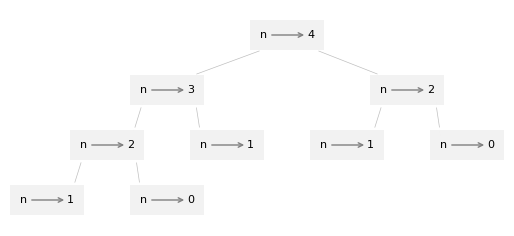

In [ ]:
from diagram import diagram, adjust, Bbox

width, height, x, y = [4.94, 2.16, -1.03, 1.91]
ax = diagram(width, height)

dx = 0.6
dy = 0.55

bboxes = []
bboxes.append(frames[4].draw(ax, x+6*dx, y))

bboxes.append(frames[3].draw(ax, x+4*dx, y-dy))
bboxes.append(frames[2].draw(ax, x+8*dx, y-dy))

bboxes.append(frames[2].draw(ax, x+3*dx, y-2*dy))
bboxes.append(frames[1].draw(ax, x+5*dx, y-2*dy))
bboxes.append(frames[1].draw(ax, x+7*dx, y-2*dy))
bboxes.append(frames[0].draw(ax, x+9*dx, y-2*dy))

bboxes.append(frames[1].draw(ax, x+2*dx, y-3*dy))
bboxes.append(frames[0].draw(ax, x+4*dx, y-3*dy))

left_arrow(ax, bboxes[0], bboxes[1])
left_arrow(ax, bboxes[1], bboxes[3])
left_arrow(ax, bboxes[3], bboxes[7])
left_arrow(ax, bboxes[2], bboxes[5])

right_arrow(ax, bboxes[0], bboxes[2])
right_arrow(ax, bboxes[1], bboxes[4])
right_arrow(ax, bboxes[2], bboxes[6])
right_arrow(ax, bboxes[3], bboxes[8])

bbox = Bbox.union(bboxes)
# adjust(x, y, bbox)

A call graph shows a set of function frames, with lines connecting each frame to the frames of the functions it calls.
At the top of the graph, `fibonacci` with `n=4` calls `fibonacci` with ` n=3` and `n=2`.
In turn, `fibonacci` with `n=3` calls `fibonacci` with `n=2` and `n=1`. And so on.

Count how many times `fibonacci(0)` and `fibonacci(1)` are called. 
This is an inefficient solution to the problem, and it gets worse as the argument gets bigger.

One solution is to keep track of values that have already been computed by storing them in a dictionary.
A previously computed value that is stored for later use is called a **memo**.
Here is a "memoized" version of `fibonacci`:

In [ ]:
known = {0:0, 1:1}

def fibonacci_memo(n):
    if n in known:
        return known[n]

    res = fibonacci_memo(n-1) + fibonacci_memo(n-2)
    known[n] = res
    return res

`known` is a dictionary that keeps track of the Fibonacci numbers we already know
It starts with two items: `0` maps to `0` and `1` maps to `1`.

Whenever `fibonacci_memo` is called, it checks `known`.
If the result is already there, it can return immediately.
Otherwise it has to compute the new value, add it to the dictionary, and return it.

Comparing the two functions, `fibonacci(40)` takes about 30 seconds to run.
`fibonacci_memo(40)` takes about 30 microseconds, so it's a million times faster.
In the notebook for this chapter, you'll see where these measurements come from.

In [ ]:
# %time fibonacci(40)

In [ ]:
%time fibonacci_memo(40)

CPU times: user 8 μs, sys: 1e+03 ns, total: 9 μs
Wall time: 9.06 μs


102334155

## Common Dictionary Patterns


### Accumulating Results from Dictionary Data

For many programming tasks, it is useful to loop through one list or dictionary while building another.
As an example, we'll loop through the words in `word_dict` and make a list of palindromes -- that is, words that are spelled the same backward and forward, like "noon" and "rotator".

In the previous chapter, one of the exercises asked you to write a function that checks whether a word is a palindrome.
Here's a solution that uses `reverse_word`.


In [ ]:
def is_palindrome(word):
    """Check if a word is a palindrome."""
    return reverse_word(word) == word

If we loop through the words in `word_dict`, we can count the number of palindromes like this.

In [ ]:
count = 0

for word in word_dict:
    if is_palindrome(word):
        count +=1
        
count

91

By now, this pattern is familiar.

* Before the loop, `count` is initialized to `0`.

* Inside the loop, if `word` is a palindrome, we increment `count`.

* When the loop ends, `count` contains the total number of palindromes.

We can use a similar pattern to make a list of palindromes.

In [ ]:
palindromes = []

for word in word_dict:
    if is_palindrome(word):
        palindromes.append(word)

palindromes[:10]

['aa', 'aba', 'aga', 'aha', 'ala', 'alula', 'ama', 'ana', 'anna', 'ava']

Here's how it works:

* Before the loop, `palindromes` is initialized with an empty list.

* Inside the loop, if `word` is a palindrome, we append it to the end of `palindromes`.

* When the loop ends, `palindromes` is a list of palindromes.

In this loop, `palindromes` is used as an **accumulator**, which is a variable that collects or accumulates data during a computation.

Now suppose we want to select only palindromes with seven or more letters.
We can loop through `palindromes` and make a new list that contains only long palindromes.

In [ ]:
long_palindromes = []

for word in palindromes:
    if len(word) >= 7:
        long_palindromes.append(word)
        
long_palindromes

['deified', 'halalah', 'reifier', 'repaper', 'reviver', 'rotator', 'sememes']

Looping through a list like this, selecting some elements and omitting others, is called **filtering**.

## Hashable Keys and Best Practices


### Lists as Values and Hashable Keys

You can put a list in a dictionary as a value.
For example, here's a dictionary that maps from the number `4` to a list of four letters.


In [ ]:
d = {4: ['r', 'o', 'u', 's']}
d

{4: ['r', 'o', 'u', 's']}

But you can't put a list in a dictionary as a key.
Here's what happens if we try.

In [ ]:
%%expect TypeError

letters = list('abcd')
d[letters] = 4

TypeError: unhashable type: 'list'

I mentioned earlier that dictionaries use hash tables, and that means that the keys have to be **hashable**.

A **hash** is a function that takes a value (of any kind) and returns an integer.
Dictionaries use these integers, called hash values, to store and look up keys.

This system only works if a key is immutable, so its hash value is always the same.
But if a key is mutable, its hash value could change, and the dictionary would not work.
That's why keys have to be hashable, and why mutable types like lists aren't.

Since dictionaries are mutable, they can't be used as keys, either.
But they *can* be used as values.

### Tuple Keys

An object is hashable if its hash value stays the same during its lifetime. An `id()` is the memory address of the object -- unique per object, but can be reused after an object is deleted.
`hash()` is a number derived from the object's contents or value, used for fast lookups.
Hashable objects can be used as dictionary keys and stored in sets.
A key rule is: if `a == b`, then `hash(a) == hash(b)`.

**Hashability caveat:** a tuple is hashable only if all of its elements are hashable.
If a tuple contains a list (or another unhashable type), it cannot be used as a dictionary key.


A hash value is just an integer that represents an object, computed by the `hash()` function. 

| Type(s) | Mutability/Conditional | Hashable | Example |
|---|---|---|---|
| `int`, `float`, `bool`, `complex` | Immutable | Yes | `42`, `3.14`, `True`, `2+3j` |
| `str` | Immutable | Yes | `"hello"` |
| `tuple` | Immutable, conditional on all elements being hashable | Yes (conditional) | `(1, "a")` yes, `([1], "a")` no |
| `frozenset` | Immutable, conditional on all elements being hashable | Yes (conditional) | `frozenset({1, 2})` |
| `bytes` | Immutable | Yes | `b"abc"` |
| `None` | Immutable singleton | Yes | `None` |
| Functions, classes | Identity-based objects | Yes (by identity) | `len`, `dict` |
| `list` | Mutable | No | `[1, 2, 3]` |
| `dict` | Mutable | No | `{"a": 1}` |
| `set` | Mutable | No | `{1, 2, 3}` |
| `bytearray` | Mutable | No | `bytearray(b"abc")` |


Here are a few quick checks. Equal tuples have equal hashes, and tuples of hashable elements are hashable.

In [ ]:
a = (1, 2)
b = (1, 2)
a == b, hash(a) == hash(b)      ### return True, True

hash((1, (2, 3)))               ###  hashes a nested tuple, returning the large number shown

7267574591690527098

In [ ]:
%%expect TypeError

mixed = (1, [2, 3])
d = {mixed: 'not hashable'}

TypeError: unhashable type: 'list'

In [ ]:
### Exercise: Hashable Tuples
#   1. Create a dictionary that uses tuples as keys to map (row, col) grid positions
#      to string values: (0,0)->'start', (1,2)->'middle', (2,2)->'end'.
#   2. Print the value at position (1, 2).
#   3. Try to use ([0, 0],) as a key — wrap it in a try/except and print the error type.
### Your code starts here.




### Your code ends here.

In [ ]:
grid = {(0,0): 'start', (1,2): 'middle', (2,2): 'end'}
print(grid[(1, 2)])    # 'middle'

try:
    bad = {([0, 0],): 'unhashable'}
except TypeError as e:
    print(type(e).__name__, e)

middle
TypeError unhashable type: 'list'
